In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('SolarDelhi.csv',parse_dates = ['Date'], index_col = ['Date'])

In [3]:
data.head()

,Precipitation,Specific_Humidity,Surface Pressure,Surface_Temperature,Clearness_Index,Radiative_Flux,Radiation
Date,,,,,,,
1986-01-01,0.0,0.003804,99.05,11.48,0.68,6.50,3.97
1986-02-01,0.0,0.003457,99.06,12.04,0.76,6.36,4.42
1986-03-01,0.0,0.002902,99.23,9.92,0.73,6.50,4.29
1986-04-01,0.0,0.002433,99.17,9.33,0.72,6.18,4.19
1986-05-01,0.0,0.002600,99.00,9.36,0.75,6.57,4.39


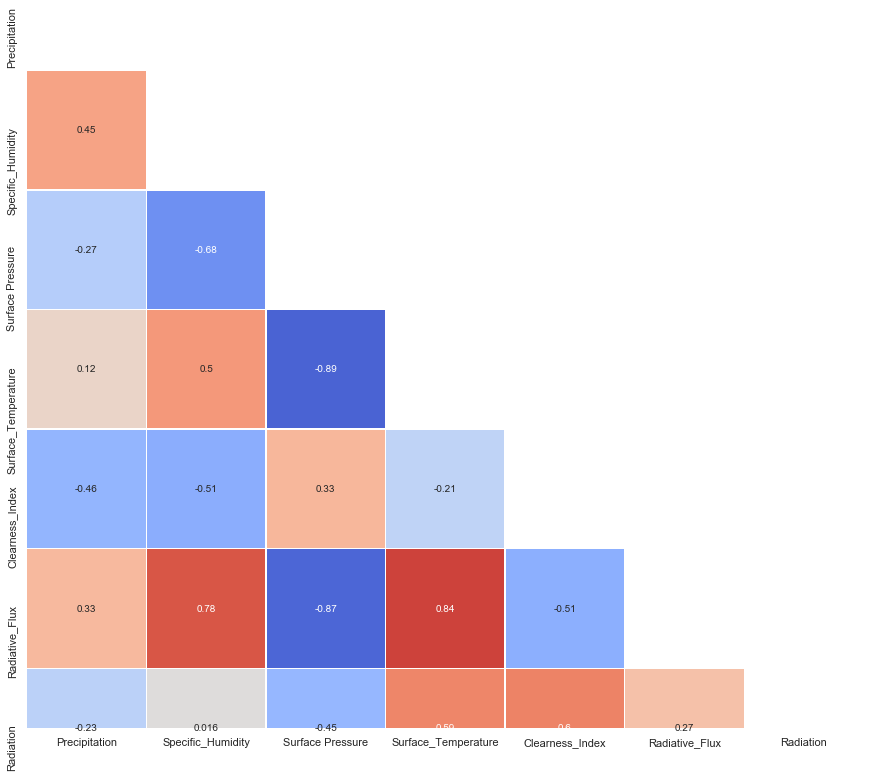

In [4]:
import numpy as np # linear algebra
from scipy import stats # statistics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # advanced plotting tools
sns.set(style="white")
%matplotlib inline
def corrPairs(df):
    #Pairwise correlation matrix
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.3, annot=True, cbar=False)

#data['WeekOfYear'] = data.index.Date # add week to view correlation

plt.figure(figsize=(15,15))
corrPairs(data)

In [5]:
data.corr()

,Precipitation,Specific_Humidity,Surface Pressure,Surface_Temperature,Clearness_Index,Radiative_Flux,Radiation
Precipitation,1.000000,0.452469,-0.265497,0.115499,-0.458199,0.325617,-0.231088
Specific_Humidity,0.452469,1.000000,-0.676242,0.501783,-0.514246,0.784656,0.015835
Surface Pressure,-0.265497,-0.676242,1.000000,-0.891904,0.334998,-0.872245,-0.446472
Surface_Temperature,0.115499,0.501783,-0.891904,1.000000,-0.208347,0.844994,0.589007
Clearness_Index,-0.458199,-0.514246,0.334998,-0.208347,1.000000,-0.505756,0.603927
Radiative_Flux,0.325617,0.784656,-0.872245,0.844994,-0.505756,1.000000,0.272500
Radiation,-0.231088,0.015835,-0.446472,0.589007,0.603927,0.272500,1.000000


In [6]:
input_feature= data.iloc[:, :].values
input_data = input_feature

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,:] = sc.fit_transform(input_feature[:,:])

In [8]:
input_data[0]

array([0.        , 0.1348561 , 0.76595745, 0.13535197, 0.84615385,
       0.12868217, 0.46593674])

In [9]:
lookback= 50

test_size=int(.3 * len(data))
X=[]
y=[]
for i in range(len(data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,6])

In [10]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 7)
X_test = X_test.reshape(X_test.shape[0],lookback, 7)
print(X.shape)
print(X_test.shape)

(12235, 50, 7)
(3735, 50, 7)


In [11]:
from keras import Sequential
from keras.layers import Dense, GRU
model = Sequential()
model.add(GRU(units=30, return_sequences= True, input_shape=(X.shape[1],7)))
model.add(GRU(units=30, return_sequences=True))
model.add(GRU(units=30))
model.add(Dense(units=1))
model.summary()

Using TensorFlow backend.
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50, 30)            3420      
_________________________________________________________________
gru_2 (GRU)                  (None, 50, 30)            5490      
_________________________________________________________________
gru_3 (GRU)                  (None, 30)                5490      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 14,431
Trainable params: 14,431
Non-trainable params: 0
_________________________________________________________________


In [12]:
def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape', r2_score])

In [13]:
history = model.fit(X, y, epochs=50, batch_size=200)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
12235/12235 [==============================] - 10s 793us/step - loss: 0.0272 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 36021.8760 - r2_score: 0.1070
Epoch 2/50
12235/12235 [==============================] - 5s 429us/step - loss: 0.0155 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 33727.3771 - r2_score: 0.4872
Epoch 3/50
12235/12235 [==============================] - 5s 413us/step - loss: 0.0143 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 27933.0961 - r2_score: 0.5282
Epoch 4/50
12235/12235 [==============================] - 5s 425us/step - loss: 0.0132 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 27184.6562 - r2_score: 0.5621 1s - loss: 0.0133 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 42624.
Epoch 5/50
12235/12235 [==============================] - 5s 425us/step - loss: 0.0130 - m

12235/12235 [==============================] - 5s 430us/step - loss: 0.0119 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 29878.8068 - r2_score: 0.6071
Epoch 42/50
12235/12235 [==============================] - 5s 444us/step - loss: 0.0119 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 28858.7740 - r2_score: 0.6053
Epoch 43/50
12235/12235 [==============================] - 5s 444us/step - loss: 0.0123 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 30073.4655 - r2_score: 0.5920
Epoch 44/50
12235/12235 [==============================] - 5s 433us/step - loss: 0.0119 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 28556.8768 - r2_score: 0.6050
Epoch 45/50
12235/12235 [==============================] - 5s 430us/step - loss: 0.0120 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 30948.0598 - r2_score: 0.6036 3s - loss: 0.0117 - mean_absolute_error: 0.0756 - mean_absolute_percenta
Epoch 46/50
12235/12235 [====

In [14]:
predicted_value= model.predict(X_test)

dict_keys(['loss', 'mean_absolute_error', 'mean_absolute_percentage_error', 'r2_score'])


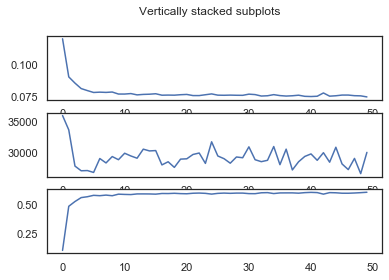

In [15]:
history_dict = history.history
print(history_dict.keys())
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(history.history['loss'])
axs[1].plot(history.history['mae'])
axs[2].plot(history.history['mape'])
axs[3].plot(history.history['r2_score'])
# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['mean_absolute_percentage_error'])
# plt.plot(history.history['r2_score'])

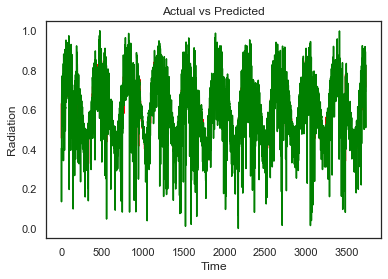

In [16]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),6], color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Radiation")
plt.show()